<a href="https://colab.research.google.com/github/adityasarve/Ai-project/blob/main/EDA_Pickupdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Exploratory Data Analysis (EDA):

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_pickup_data.csv')

Examine the first few rows using pandas

In [3]:
df.head()

,order_id,region_id,city,courier_id,accept_time,time_window_start,time_window_end,lng,lat,aoi_id,...,pickup_gps_time,pickup_gps_lng,pickup_gps_lat,accept_gps_time,accept_gps_lng,accept_gps_lat,ds,time_window_duration,task_duration,distance
0,2301722,3,Chongqing,4706,NaN,NaN,NaN,106.46869,29.47191,218,...,NaN,106.46821,29.46771,NaN,106.46929,29.47231,1009,NaN,NaN,0.004725
1,780972,3,Chongqing,4706,NaN,NaN,NaN,106.46875,29.47208,218,...,NaN,106.46930,29.47238,NaN,106.47907,29.43180,522,NaN,NaN,0.041740
2,283833,3,Chongqing,6693,NaN,NaN,NaN,106.46863,29.47203,218,...,NaN,106.47037,29.47237,NaN,106.49162,29.43503,503,NaN,NaN,0.042963
3,4315552,3,Chongqing,317,NaN,NaN,NaN,106.46861,29.48829,337,...,NaN,106.46860,29.48788,NaN,106.47521,29.48561,606,NaN,NaN,0.006989
4,728111,3,Chongqing,317,NaN,NaN,NaN,106.46772,29.48808,337,...,NaN,106.46918,29.48724,NaN,106.46635,29.49159,521,NaN,NaN,0.005190


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064432 entries, 0 to 3064431
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   order_id              int64  
 1   region_id             int64  
 2   city                  object 
 3   courier_id            int64  
 4   accept_time           float64
 5   time_window_start     float64
 6   time_window_end       float64
 7   lng                   float64
 8   lat                   float64
 9   aoi_id                int64  
 10  aoi_type              int64  
 11  pickup_time           float64
 12  pickup_gps_time       float64
 13  pickup_gps_lng        float64
 14  pickup_gps_lat        float64
 15  accept_gps_time       float64
 16  accept_gps_lng        float64
 17  accept_gps_lat        float64
 18  ds                    int64  
 19  time_window_duration  float64
 20  task_duration         float64
 21  distance              float64
dtypes: float64(15), int64(6), object(1)
memory

Checking for missing values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
order_id                      0
region_id                     0
city                          0
courier_id                    0
accept_time             3064432
time_window_start       3064432
time_window_end         3064432
lng                           0
lat                           0
aoi_id                        0
aoi_type                      0
pickup_time             3064432
pickup_gps_time         3064432
pickup_gps_lng                0
pickup_gps_lat                0
accept_gps_time         3064432
accept_gps_lng                0
accept_gps_lat                0
ds                            0
time_window_duration    3064432
task_duration           3064432
distance                      0
dtype: int64


Checking for numerical features

In [6]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number])

In [7]:
# Calculate summary statistics
summary_stats = numerical_cols.describe()

In [8]:
print(summary_stats)

           order_id     region_id    courier_id  accept_time  \
count  3.064432e+06  3.064432e+06  3.064432e+06          0.0   
mean   3.091056e+06  6.629287e+01  7.877121e+03          NaN   
std    1.775763e+06  3.942328e+01  4.550730e+03          NaN   
min    1.000000e+00  0.000000e+00  4.000000e+00          NaN   
25%    1.560869e+06  3.200000e+01  4.057000e+03          NaN   
50%    3.094370e+06  6.800000e+01  7.870000e+03          NaN   
75%    4.627465e+06  1.000000e+02  1.170500e+04          NaN   
max    6.161997e+06  1.340000e+02  1.605600e+04          NaN   

       time_window_start  time_window_end           lng           lat  \
count                0.0              0.0  3.064432e+06  3.064432e+06   
mean                 NaN              NaN  1.185823e+02  3.273637e+01   
std                  NaN              NaN  5.686934e+00  3.952358e+00   
min                  NaN              NaN  1.053727e+02  2.891105e+01   
25%                  NaN              NaN  1.199501e+02  3

Visualizing the distributions of numerical features

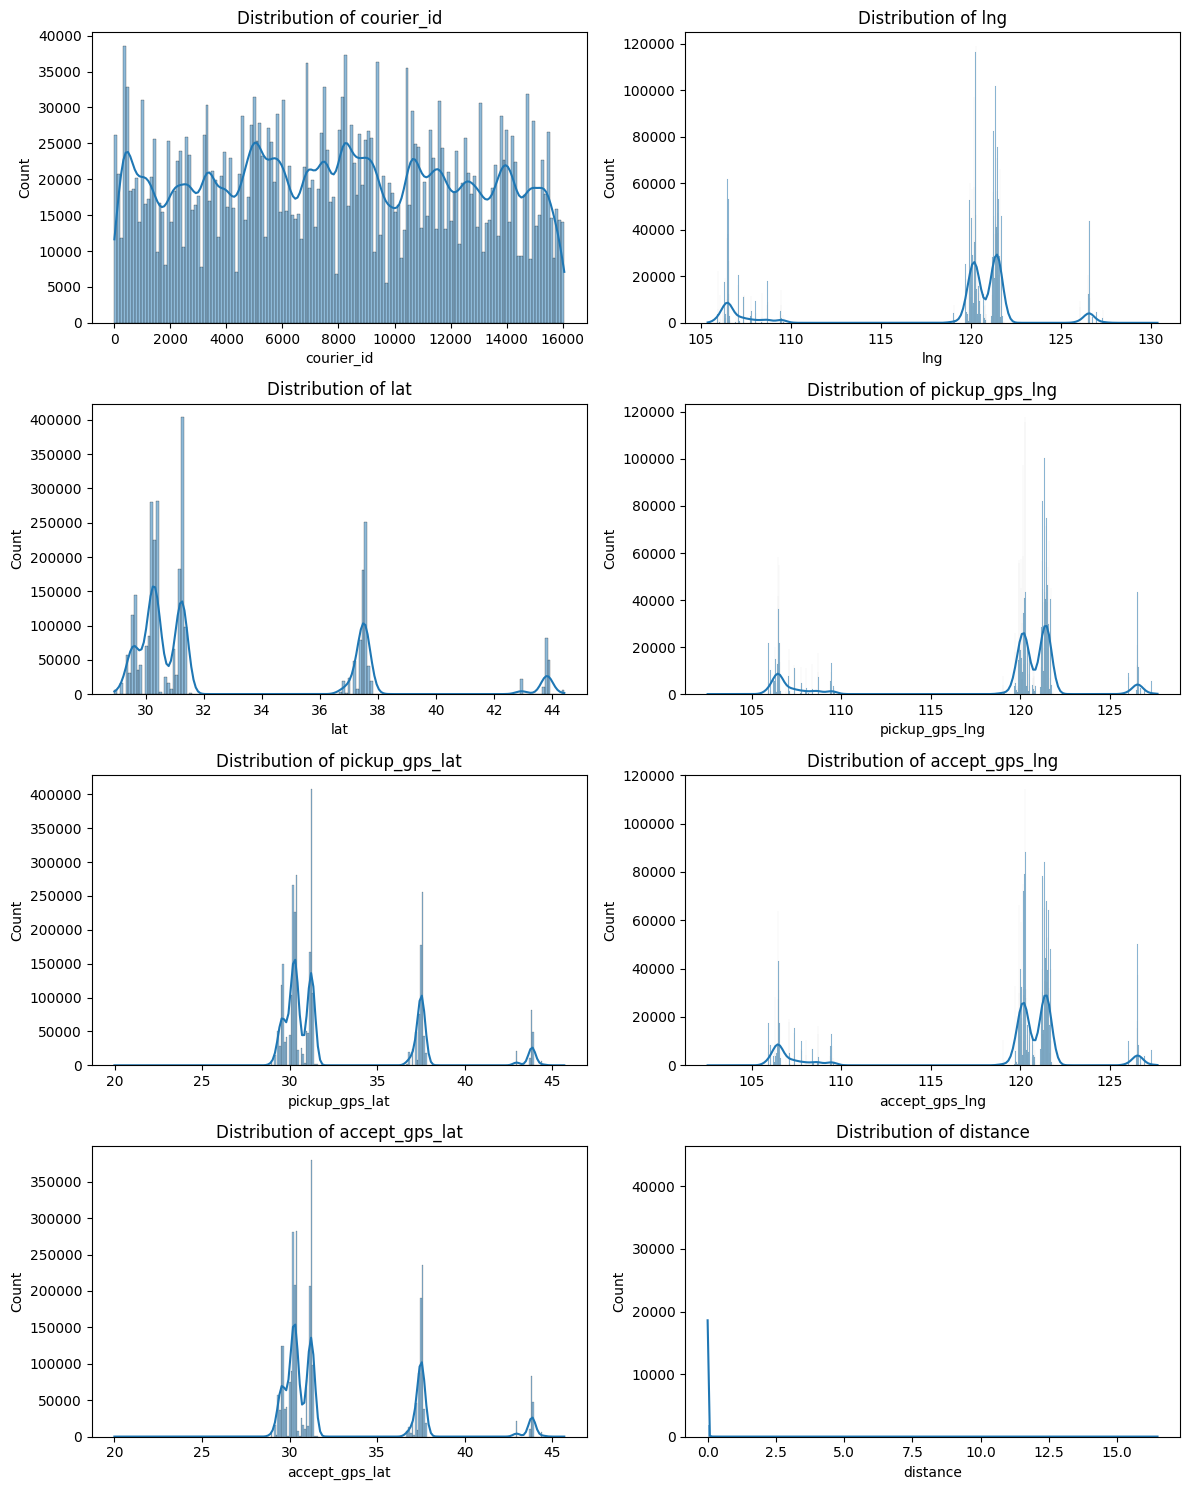

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# List of numerical features
numerical_features = ['courier_id','lng', 'lat', 'pickup_gps_lng', 'pickup_gps_lat',
                     'accept_gps_lng', 'accept_gps_lat', 'distance']

# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))

# Iterate through features and create plots
for i, feature in enumerate(numerical_features):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

#### The distributions of several numerical features are skewed and contain outliers. Some features exhibit multimodality, suggesting potential sub-groups within the data.

Exploreing the distribution of categorical features

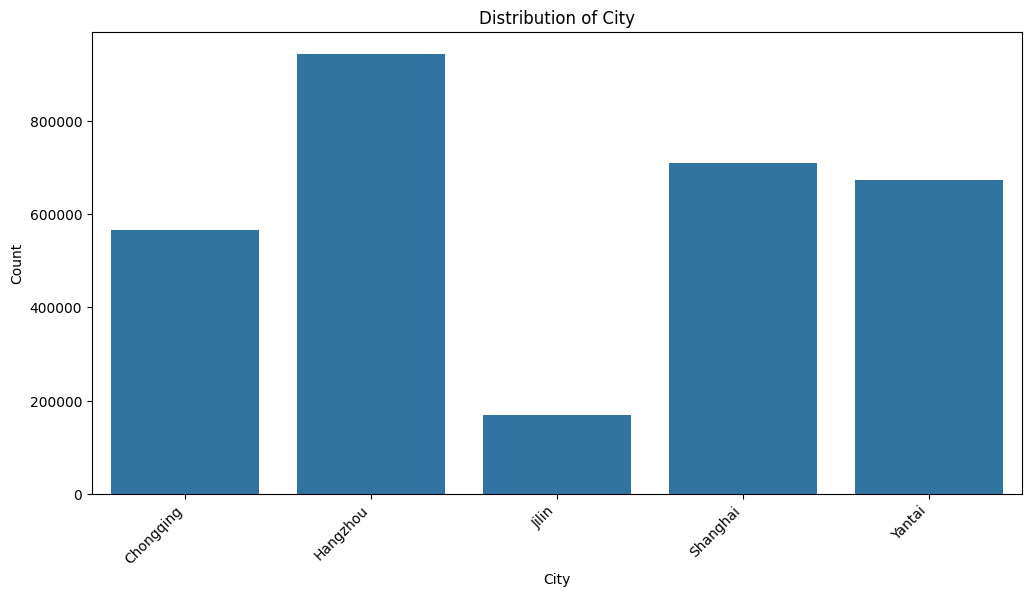

In [10]:
# Distribution of 'city'
plt.figure(figsize=(12, 6))
sns.countplot(x='city', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

The bar chart shows an uneven distribution of data across cities, with Hangzhou having the highest count, followed by Shanghai, while yantai,chongqing and jilin have significantly lower counts.

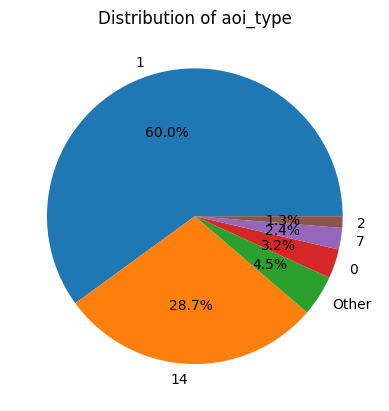

In [11]:
# AOI Type Distribution
top_aoi_types = df['aoi_type'].value_counts().head(5).index
df['aoi_type'] = df['aoi_type'].apply(lambda x: 'Other' if x not in top_aoi_types else x)

aoi_type_counts = df['aoi_type'].value_counts()

plt.pie(aoi_type_counts.values, labels=aoi_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of aoi_type')
plt.show()

#### The pie chart reveals that "aoi_type 1" is the dominant category, comprising 60% of the data, while other categories have significantly lower proportions.

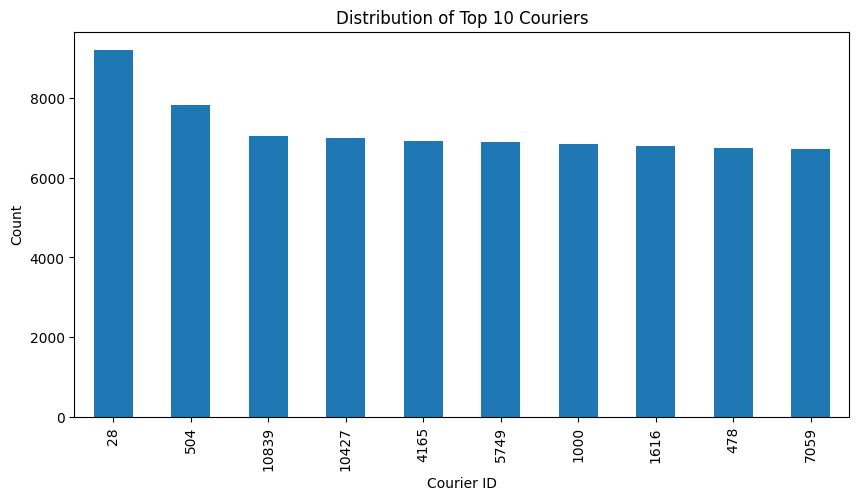

In [12]:
# Courier Distribution - Top 10 Couriers
top_couriers = df['courier_id'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_couriers.plot(kind='bar')
plt.title('Distribution of Top 10 Couriers')
plt.xlabel('Courier ID')
plt.ylabel('Count')
plt.show()

#### The bar chart shows the distribution of order counts for the top 10 couriers. Courier 1 has the highest number of orders, followed by other couriers with slightly lower order counts.

Checking for outliers

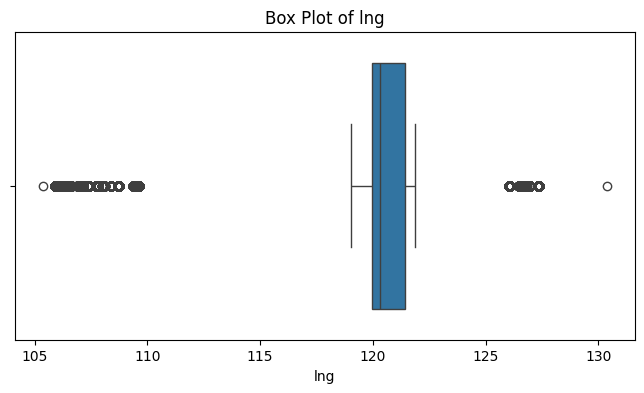

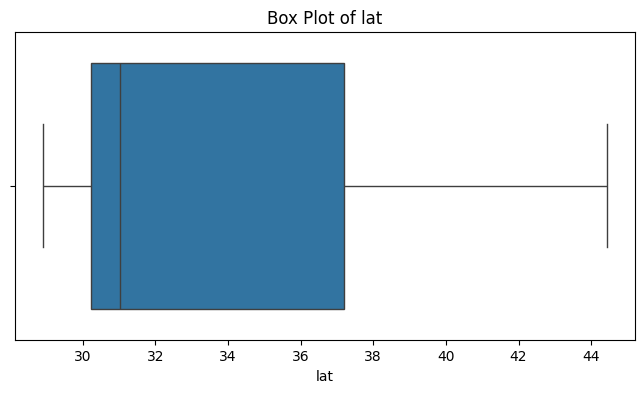

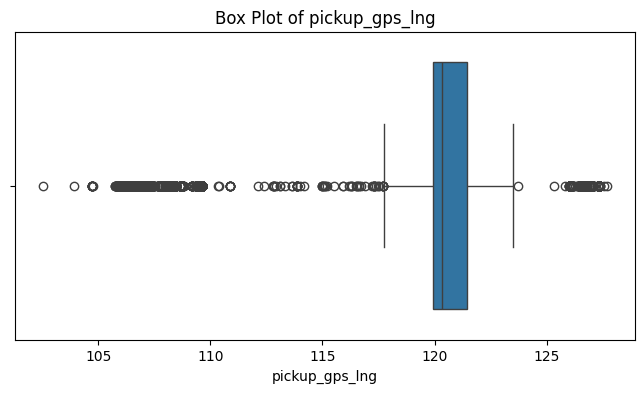

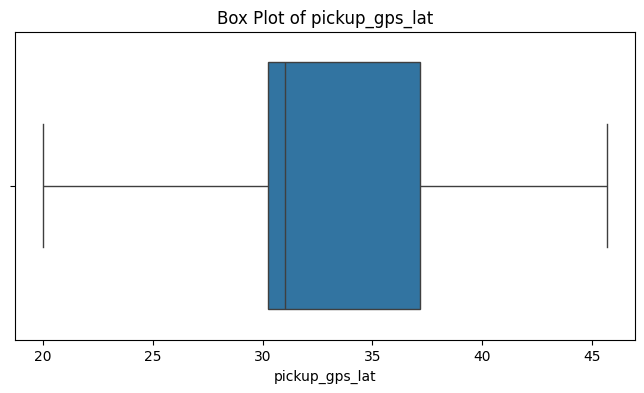

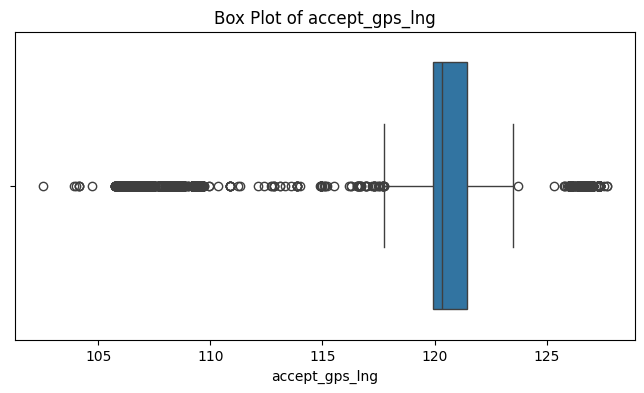

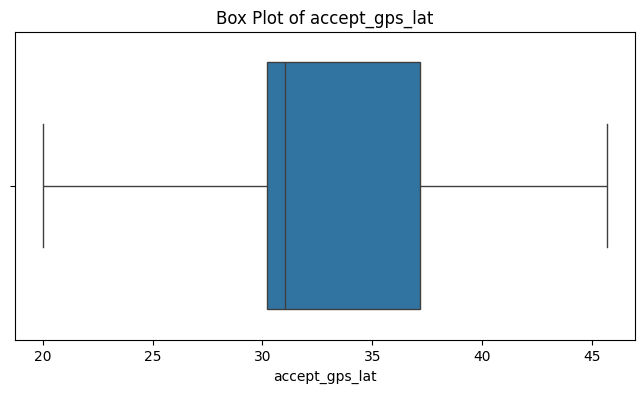

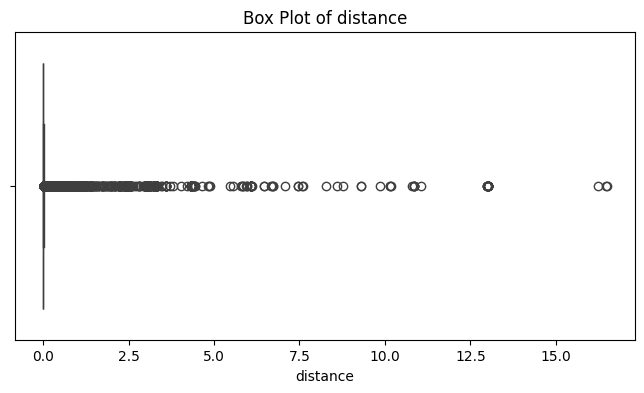

In [13]:
# List of numerical features
numerical_features = ['lng', 'lat', 'pickup_gps_lng', 'pickup_gps_lat',
                      'accept_gps_lng', 'accept_gps_lat', 'distance']

# Create box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=feature, data=df)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

#### The analysis reveals outliers in geographic coordinates (longitude and latitude) for both order locations and courier locations. Additionally, the 'distance' feature exhibits a long tail, indicating the presence of deliveries with significantly longer distances compared to the majority.

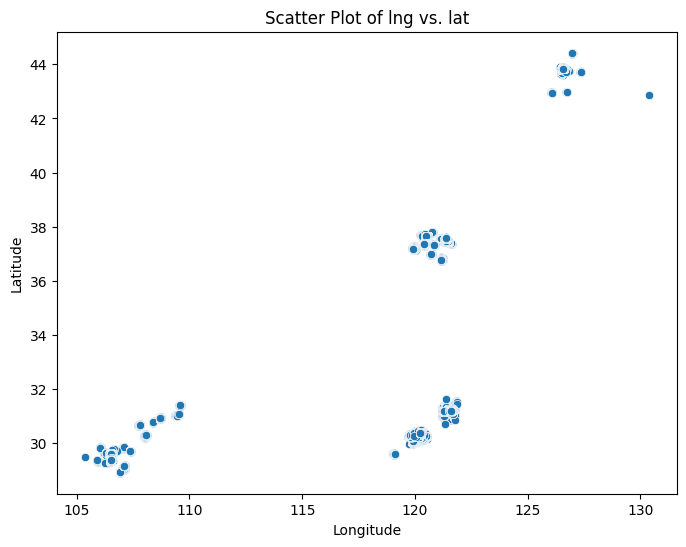

In [14]:
# Example of a scatter plot (using 'lng' and 'lat')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lng', y='lat', data=df)
plt.title('Scatter Plot of lng vs. lat')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### The scatter plot of 'lng' vs. 'lat' reveals clusters of data points, suggesting potential spatial patterns or regional concentrations of orders.

Univariate Data Analysis

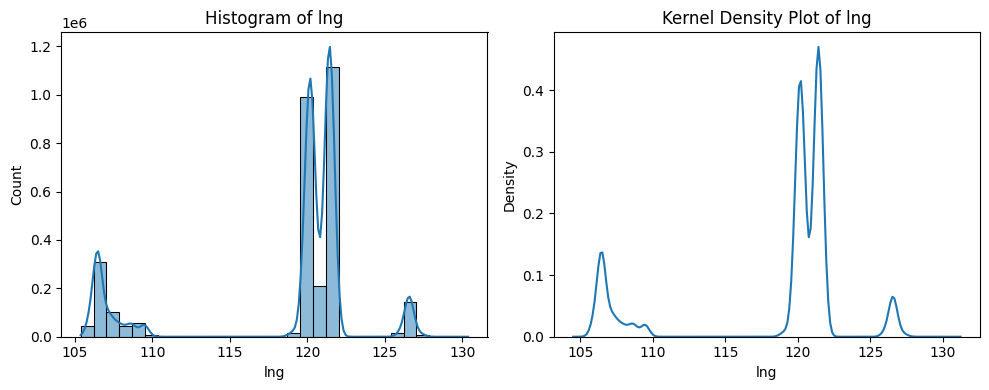

Summary Statistics for lng:

count    3.064432e+06
mean     1.185823e+02
std      5.686934e+00
min      1.053727e+02
25%      1.199501e+02
50%      1.203198e+02
75%      1.214321e+02
max      1.303666e+02
Name: lng, dtype: float64




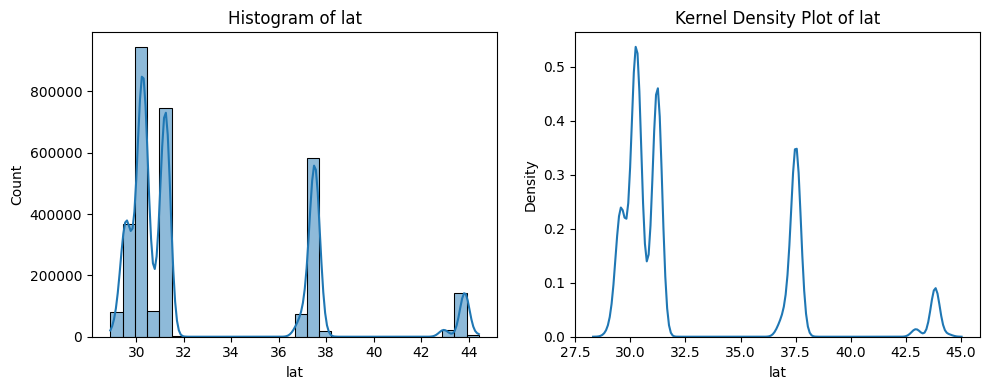

Summary Statistics for lat:

count    3.064432e+06
mean     3.273637e+01
std      3.952358e+00
min      2.891105e+01
25%      3.022361e+01
50%      3.102561e+01
75%      3.718843e+01
max      4.442747e+01
Name: lat, dtype: float64




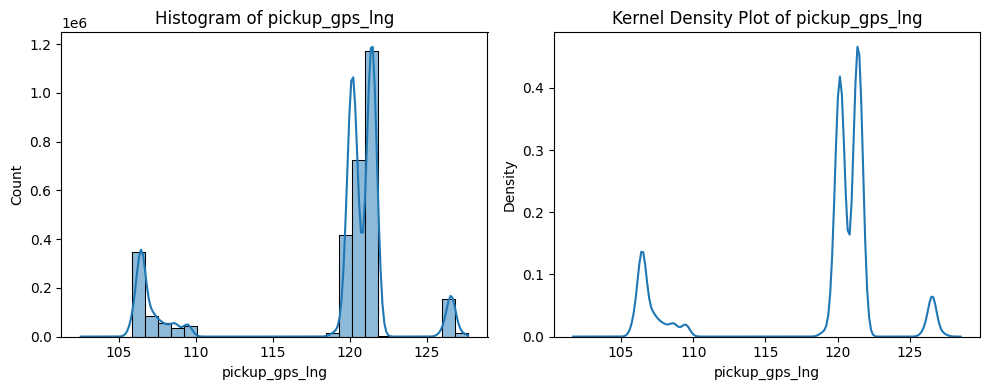

Summary Statistics for pickup_gps_lng:

count    3.064432e+06
mean     1.185824e+02
std      5.686434e+00
min      1.025392e+02
25%      1.199499e+02
50%      1.203188e+02
75%      1.214319e+02
max      1.276731e+02
Name: pickup_gps_lng, dtype: float64




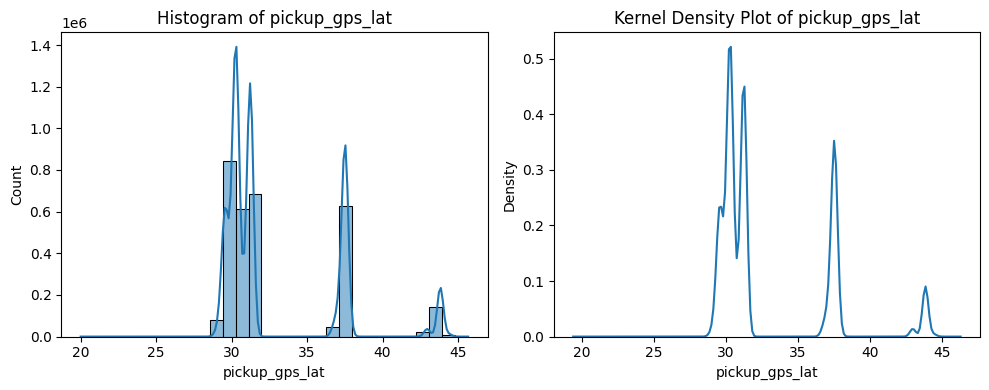

Summary Statistics for pickup_gps_lat:

count    3.064432e+06
mean     3.273665e+01
std      3.952300e+00
min      1.999148e+01
25%      3.022370e+01
50%      3.102593e+01
75%      3.718871e+01
max      4.567432e+01
Name: pickup_gps_lat, dtype: float64




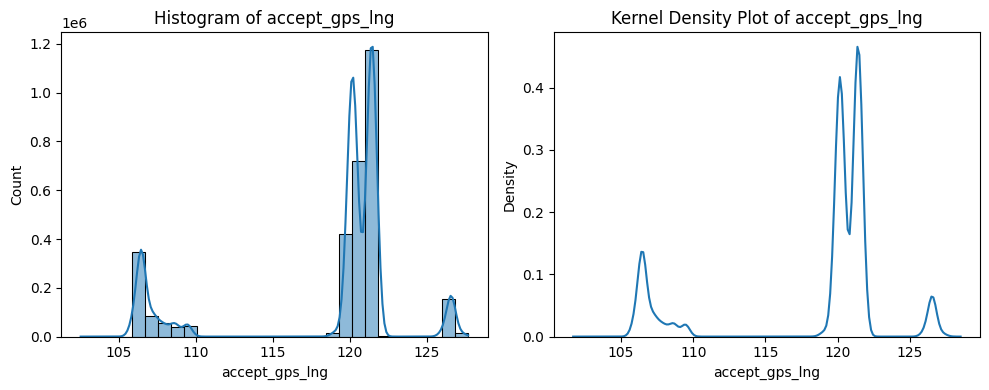

Summary Statistics for accept_gps_lng:

count    3.064432e+06
mean     1.185830e+02
std      5.686334e+00
min      1.025391e+02
25%      1.199489e+02
50%      1.203254e+02
75%      1.214290e+02
max      1.276731e+02
Name: accept_gps_lng, dtype: float64




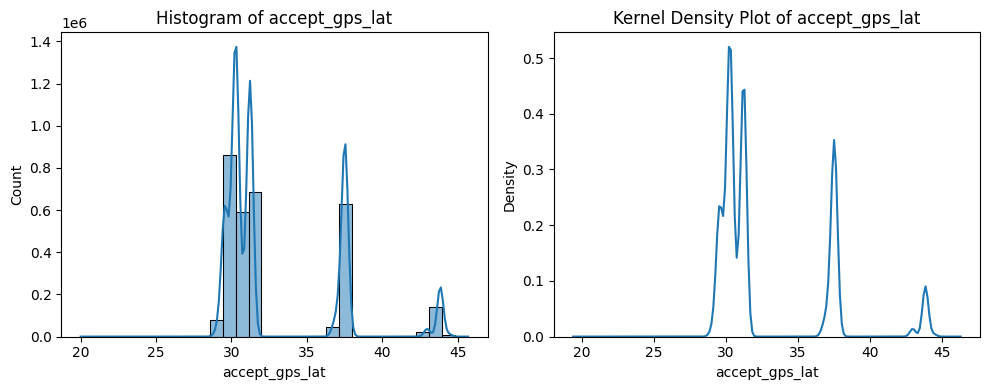

Summary Statistics for accept_gps_lat:

count    3.064432e+06
mean     3.273635e+01
std      3.951924e+00
min      2.000799e+01
25%      3.022333e+01
50%      3.102634e+01
75%      3.718947e+01
max      4.567428e+01
Name: accept_gps_lat, dtype: float64




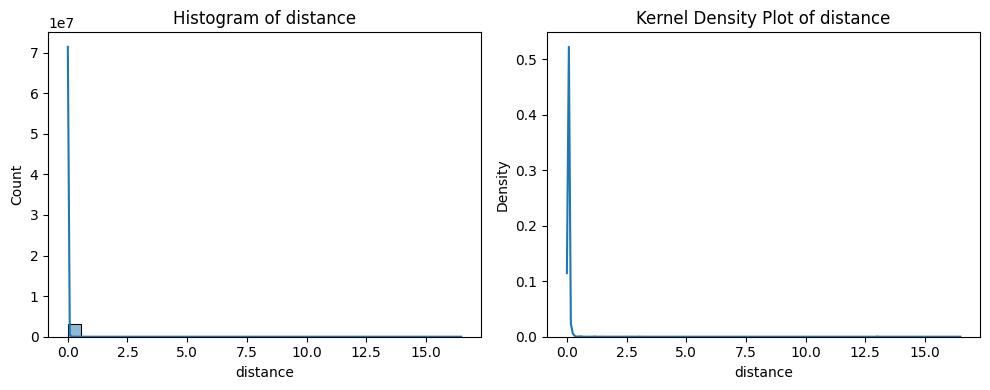

Summary Statistics for distance:

count    3.064432e+06
mean     1.245330e-02
std      6.616577e-02
min      0.000000e+00
25%      2.759438e-03
50%      5.844788e-03
75%      1.314805e-02
max      1.648354e+01
Name: distance, dtype: float64




In [15]:
# List of numerical features
numerical_features = ['lng', 'lat', 'pickup_gps_lng', 'pickup_gps_lat',
                      'accept_gps_lng', 'accept_gps_lat', 'distance']

# Function to analyze and plot distribution
def analyze_distribution(feature):
    """
    Analyzes the distribution of a numerical feature using histograms,
    kernel density plots, and summary statistics.

    Args:
        feature: Name of the numerical feature.

    """
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')

    # Kernel Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[feature])
    plt.title(f'Kernel Density Plot of {feature}')

    plt.tight_layout()
    plt.show()

    # Summary statistics
    print(f"Summary Statistics for {feature}:\n")
    print(df[feature].describe())
    print("\n")

# Analyze and plot distribution for each numerical feature
for feature in numerical_features:
    analyze_distribution(feature)

#### The analysis reveals that the distributions of geographic coordinates (latitude and longitude) for both order locations and courier locations exhibit multiple peaks, suggesting clustering in specific areas. The distribution of distances is skewed to the right, indicating the presence of longer-distance deliveries. These findings highlight the spatial patterns and potential outliers in the dataset, which should be considered for further analysis and modeling.

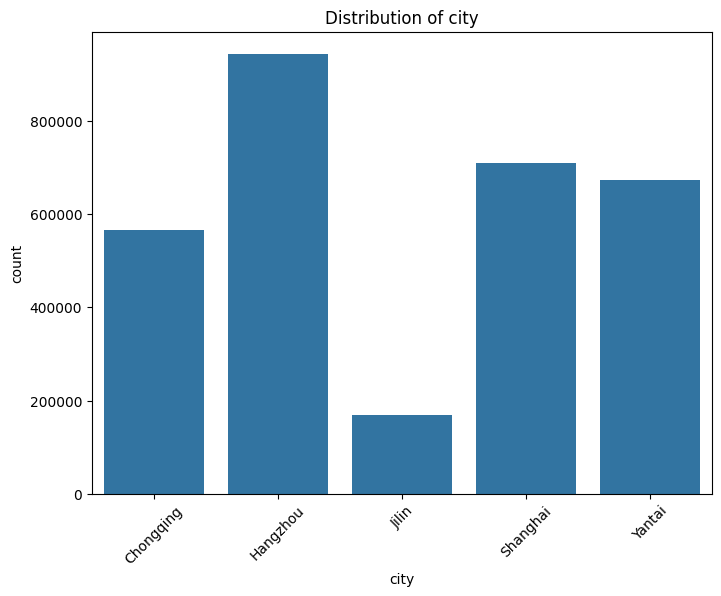

Frequency Distribution of city:

city
Hangzhou     944524
Shanghai     711074
Yantai       673764
Chongqing    565817
Jilin        169253
Name: count, dtype: int64




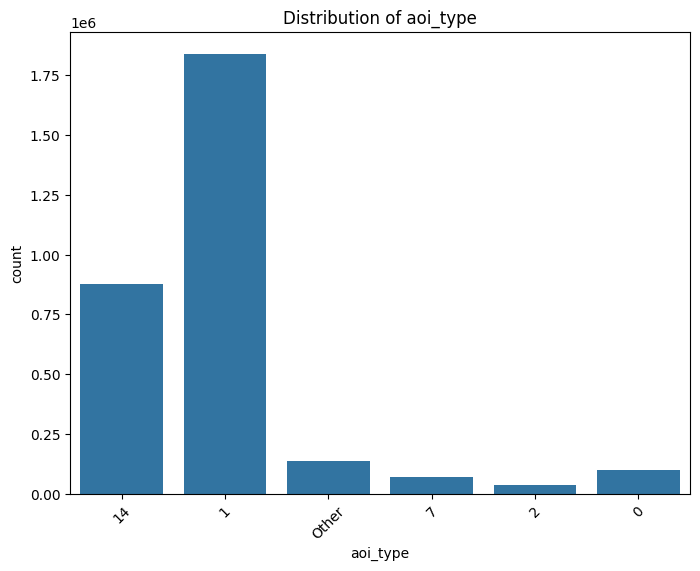

Frequency Distribution of aoi_type:

aoi_type
1        1839311
14        879198
Other     136983
0          97780
7          72300
2          38860
Name: count, dtype: int64




In [16]:
# Categorical Columns
categorical_columns = ['city', 'aoi_type']

# Loop through each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))

    # Bar Plot
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

    # Frequency Distribution
    print(f'Frequency Distribution of {column}:\n')
    print(df[column].value_counts())
    print('\n')

#### The analysis reveals a highly skewed distribution for both cities and "aoi_type", with a significant majority of orders concentrated in a few specific categories.

Bivariate Data Analysis

 Exploreing the relationship between pairs of numerical features using scatter plots or pair plots

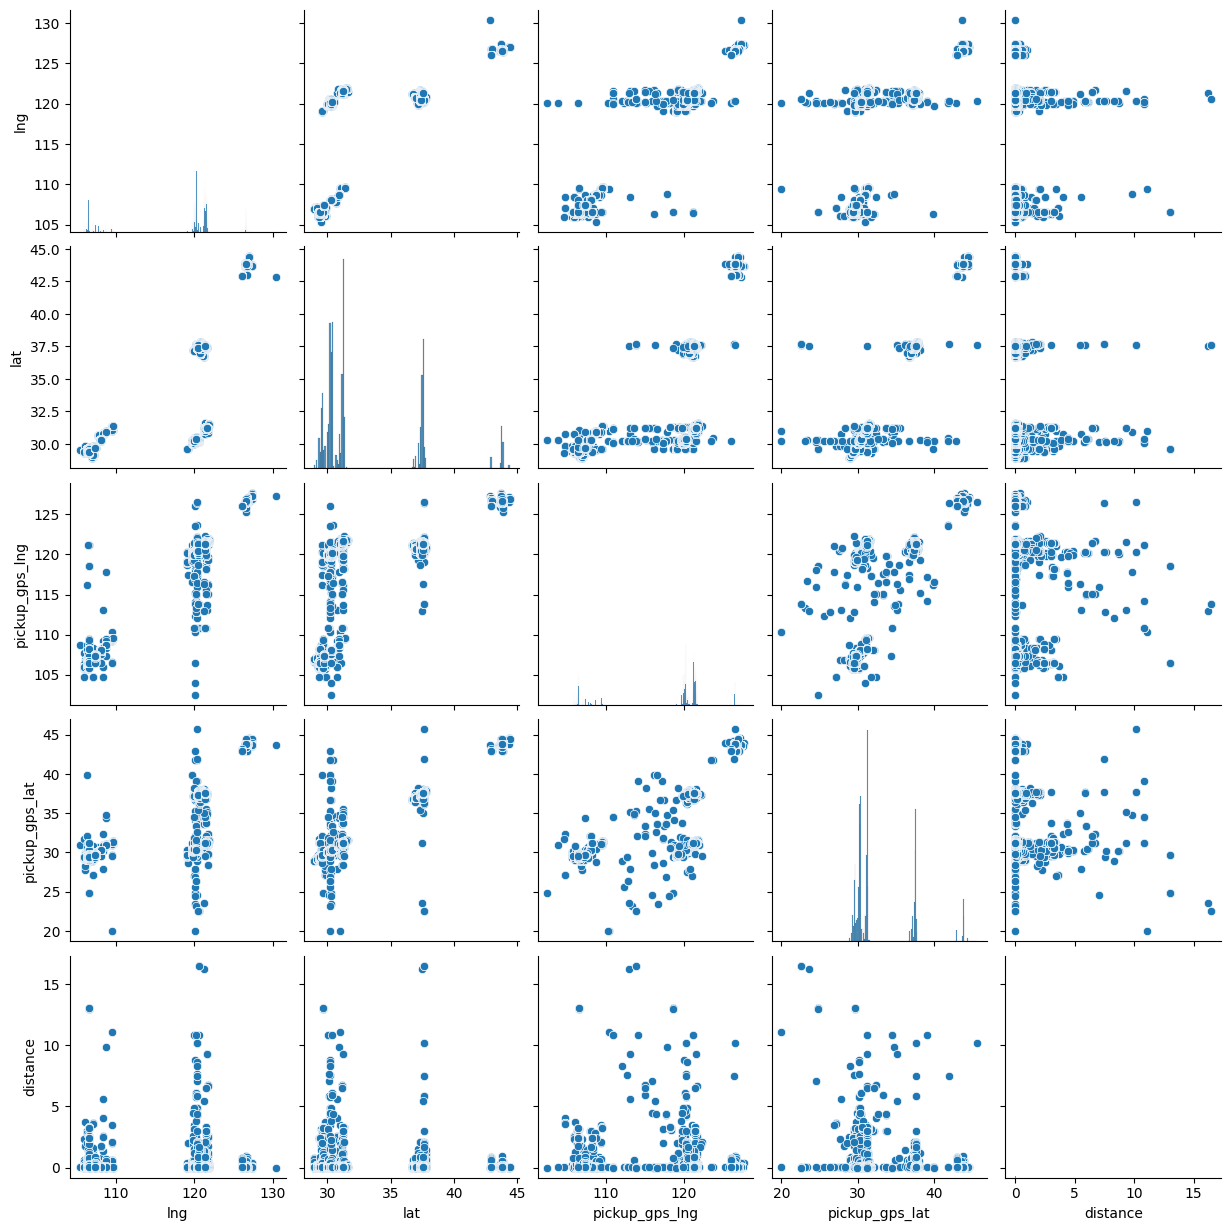

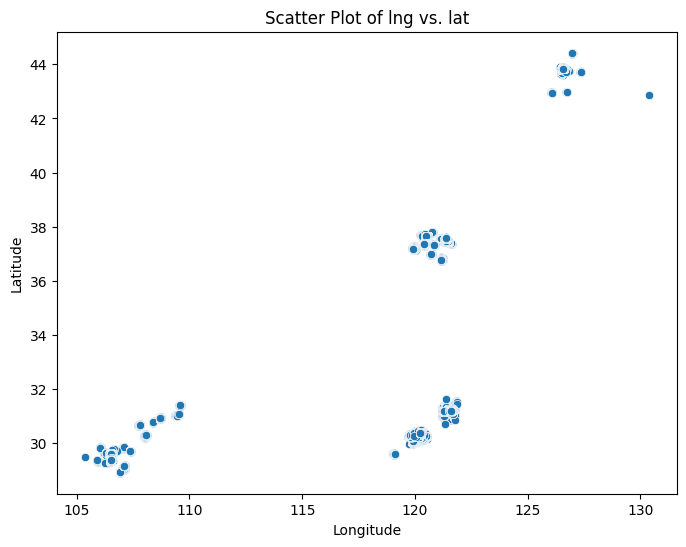

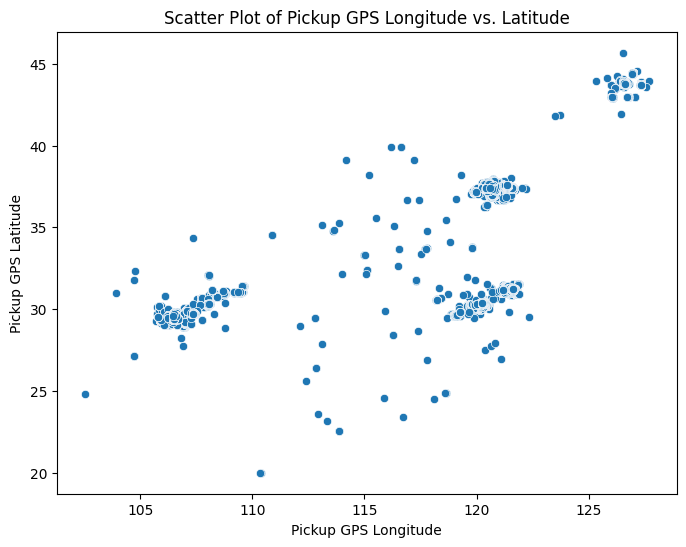

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of numerical features for pair plot
selected_features = ['lng', 'lat', 'pickup_gps_lng', 'pickup_gps_lat', 'distance']

# Create a pair plot
sns.pairplot(df[selected_features])
plt.show()

# Create individual scatter plots for specific pairs of interest
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lng', y='lat', data=df)
plt.title('Scatter Plot of lng vs. lat')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pickup_gps_lng', y='pickup_gps_lat', data=df)
plt.title('Scatter Plot of Pickup GPS Longitude vs. Latitude')
plt.xlabel('Pickup GPS Longitude')
plt.ylabel('Pickup GPS Latitude')
plt.show()

#### The scatter plots of "lng" vs. "lat" and "pickup_gps_lng" vs. "pickup_gps_lat" both reveal distinct clusters of data points, indicating that orders and pickups tend to originate from specific geographic areas. These clusters suggest potential spatial patterns and regional concentrations of activity within the dataset

Computing correlation coefficients between pairs of numerical features to quantify their linear relationship

In [18]:
# Compute Pearson correlation matrix
correlation_matrix = df[numerical_features].corr(method='pearson')
print("Pearson Correlation Matrix:\n", correlation_matrix)

# Compute Spearman correlation matrix
spearman_correlation_matrix = df[numerical_features].corr(method='spearman')
print("Spearman Correlation Matrix:\n", spearman_correlation_matrix)

Pearson Correlation Matrix:
                      lng       lat  pickup_gps_lng  pickup_gps_lat  \
lng             1.000000  0.510131        0.999955        0.510031   
lat             0.510131  1.000000        0.510142        0.999937   
pickup_gps_lng  0.999955  0.510142        1.000000        0.510073   
pickup_gps_lat  0.510031  0.999937        0.510073        1.000000   
accept_gps_lng  0.999942  0.510146        0.999953        0.510070   
accept_gps_lat  0.510019  0.999934        0.510054        0.999953   
distance       -0.014542 -0.005773       -0.014216       -0.005933   

                accept_gps_lng  accept_gps_lat  distance  
lng                   0.999942        0.510019 -0.014542  
lat                   0.510146        0.999934 -0.005773  
pickup_gps_lng        0.999953        0.510054 -0.014216  
pickup_gps_lat        0.510070        0.999953 -0.005933  
accept_gps_lng        1.000000        0.510056 -0.014370  
accept_gps_lat        0.510056        1.000000 -0.004507

#### The correlation analysis reveals strong positive correlations between longitude and latitude coordinates (e.g., lng with pickup_gps_lng, lat with pickup_gps_lat), indicating a strong spatial relationship between delivery locations, pickup locations, and courier acceptance locations.

#### Most other feature pairs exhibit weak or negligible correlations, suggesting limited linear relationships between them.

#### These findings highlight the spatial dependencies within the data and can be valuable for tasks like route optimization and demand forecasting.

 Investigate the relationship between numerical and categorical features using box plots or violin plots.

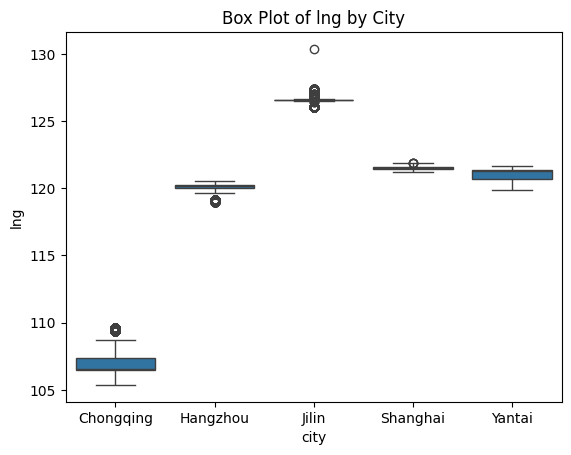

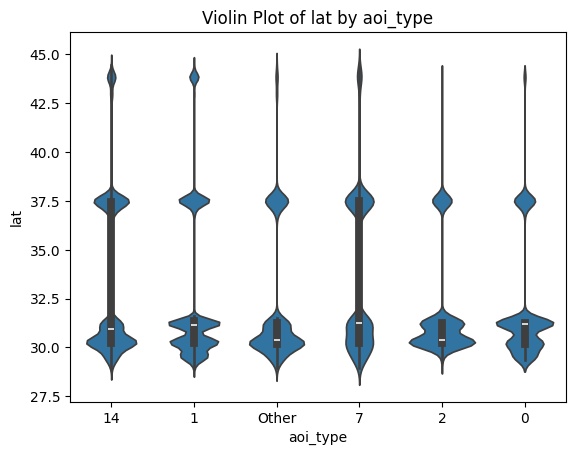

In [19]:
# Box plot of 'lng' for different 'city' categories
sns.boxplot(x='city', y='lng', data=df)
plt.title('Box Plot of lng by City')
plt.show()

# Violin plot of 'lat' for different 'aoi_type' categories
sns.violinplot(x='aoi_type', y='lat', data=df)
plt.title('Violin Plot of lat by aoi_type')
plt.show()

Multivariate Data Analysis

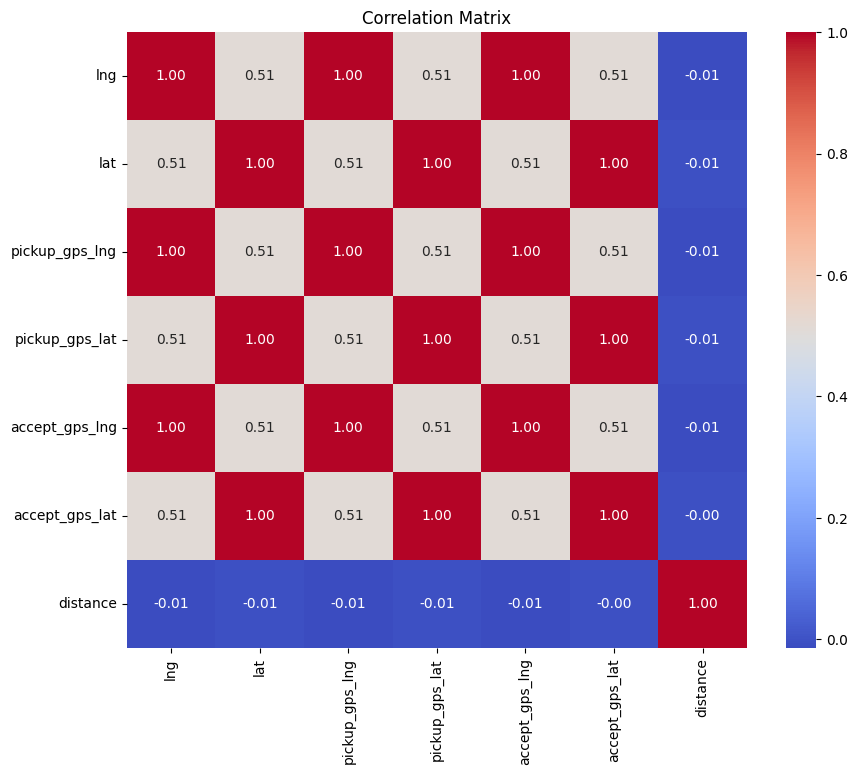

In [20]:
# Select numerical features (replace with your actual feature names)
numerical_features = ['lng', 'lat', 'pickup_gps_lng', 'pickup_gps_lat',
                      'accept_gps_lng', 'accept_gps_lat', 'distance']
# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### The heatmap reveals strong positive correlations between longitude and latitude coordinates of delivery locations and pickup locations, indicating a strong spatial dependency in the data. This suggests that deliveries are likely to occur within close proximity to their respective pickup points. Other feature pairs generally show weaker or no significant linear relationships.

Principal Component Analysis (PCA)

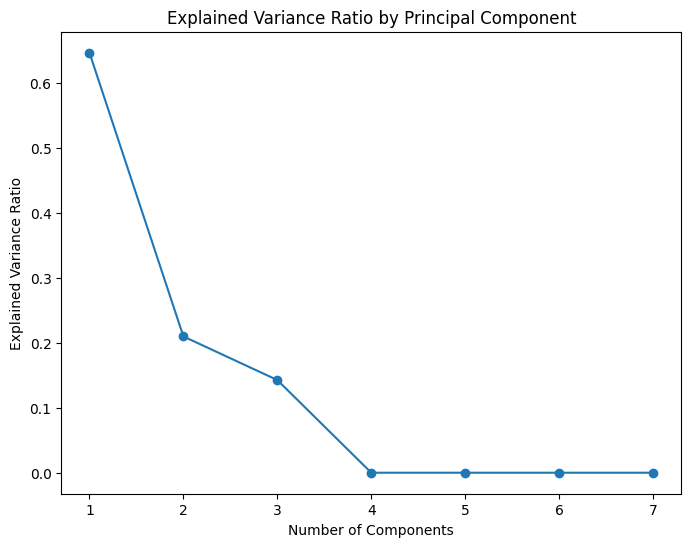

Number of components kept: 3
   order_id  region_id       city  courier_id  accept_time  time_window_start  \
0   2301722          3  Chongqing        4706          NaN                NaN   
1    780972          3  Chongqing        4706          NaN                NaN   
2    283833          3  Chongqing        6693          NaN                NaN   
3   4315552          3  Chongqing         317          NaN                NaN   
4    728111          3  Chongqing         317          NaN                NaN   

   time_window_end        lng       lat  aoi_id  ... accept_gps_time  \
0              NaN  106.46869  29.47191     218  ...             NaN   
1              NaN  106.46875  29.47208     218  ...             NaN   
2              NaN  106.46863  29.47203     218  ...             NaN   
3              NaN  106.46861  29.48829     337  ...             NaN   
4              NaN  106.46772  29.48808     337  ...             NaN   

   accept_gps_lng  accept_gps_lat    ds  time_windo

In [22]:



# Select numerical features
numerical_features = ['lng', 'lat', 'pickup_gps_lng', 'pickup_gps_lat',
                      'accept_gps_lng', 'accept_gps_lat', 'distance']

# Extract the data for numerical features
data = df[numerical_features]

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create a PCA object
pca = PCA()

# Fit and transform the data
principal_components = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Determine the number of components to keep (e.g., keep 95% of variance)
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1

# Create PCA with selected number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(data_scaled)

# Create DataFrame of principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])

# Concatenate with original DataFrame
df_pca = pd.concat([df, principal_df], axis=1)

print(f"Number of components kept: {num_components}")
print(df_pca.head())

#### The data appears to contain order-related information with features such as location coordinates, timestamps, and principal components. The PCA analysis reveals that the first few principal components capture a significant portion of the variance in the data. This dimensionality reduction, along with the identified spatial patterns and potential temporal trends within the data, can be leveraged for various downstream tasks, such as route optimization, demand forecasting, and customer segmentation.

Feature interaction

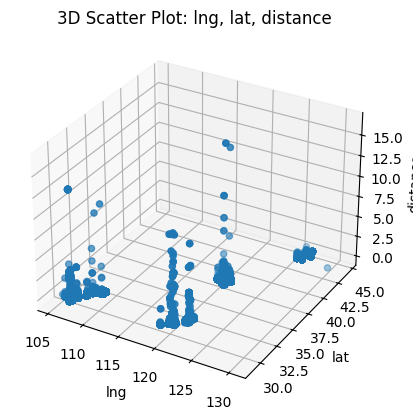

In [23]:

from mpl_toolkits.mplot3d import Axes3D

# Select numerical features
numerical_features = ['lng', 'lat', 'distance']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(df[numerical_features[0]], df[numerical_features[1]], df[numerical_features[2]])

# Set labels and title
ax.set_xlabel(numerical_features[0])
ax.set_ylabel(numerical_features[1])
ax.set_zlabel(numerical_features[2])
plt.title('3D Scatter Plot: ' + ', '.join(numerical_features))

plt.show()

#### The 3D scatter plot provides a visual representation of the relationships between 'lng', 'lat', and 'distance'. It allows for the identification of potential spatial clusters, outliers, and overall data distribution in three dimensions. This visualization can help in understanding the complex interdependencies between these features and gain deeper insights into the underlying patterns in the data.

### Conclusion

#### The analysis reveals a complex interplay of factors influencing order characteristics. Geographically, order locations cluster in specific areas, evident in the multimodal distributions of latitude and longitude. The distribution of orders across cities and aoi_type categories is highly skewed, with a significant majority concentrated in a few specific areas. The distance feature exhibits a right-skewed distribution, indicating a predominance of shorter deliveries with a few longer ones. Strong positive correlations were found between the longitude and latitude coordinates of delivery and pickup locations, highlighting the spatial dependency of orders. Visual analysis, including scatter plots and violin plots, further reinforces these patterns, revealing spatial clusters, potential outliers, and variations in distributions across different categories. Finally, PCA identified principal components that capture a significant portion of the data variance, enabling dimensionality reduction while preserving essential information.

### Insights

#### Our analysis reveals that order data exhibits distinct geographic patterns. Orders tend to cluster in specific areas, and their distribution across cities and categories is uneven. Most deliveries are relatively short, but some are significantly longer.  We found strong correlations between delivery and pickup locations, confirming the spatial dependency of orders. Visualization techniques helped us identify clusters, outliers, and variations in data distributions. Finally, Principal Component Analysis (PCA) effectively reduced the data's complexity while preserving key information. These insights can be used to optimize delivery routes, forecast demand, allocate resources efficiently, and better understand customer segments.